In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [39]:
df = pd.read_csv("orders.csv")

df['DateTime'] = pd.to_datetime(df['DateTime_CartFinalize'])
df['DateTime']

0        2015-10-15 08:50:56
1        2018-02-11 00:29:26
2        2016-06-14 00:30:08
3        2018-09-03 14:37:19
4        2016-05-21 11:51:02
                 ...        
199995   2018-04-03 12:07:01
199996   2016-07-09 19:14:09
199997   2017-03-08 23:47:06
199998   2017-02-08 14:59:39
199999   2017-06-17 10:08:06
Name: DateTime, Length: 200000, dtype: datetime64[ns]

In [40]:
df.columns

Index(['ID_Order', 'ID_Customer', 'ID_Item', 'DateTime_CartFinalize',
       'Amount_Gross_Order', 'city_name_fa', 'Quantity_item', 'DateTime'],
      dtype='object')

### تعداد فروش کلی به ازای هرروز

In [41]:
daily_sales = df.groupby(df['DateTime'].dt.date)['Quantity_item'].sum().reset_index()
daily_sales.columns = ['DateTime' , 'Total_Quantity_item']
daily_sales

,DateTime,Total_Quantity_item
0,2013-09-27,3.0
1,2013-09-28,2.0
2,2013-09-29,1.0
3,2013-09-30,1.0
4,2013-10-04,4.0
...,...,...
1885,2018-12-07,242.0
1886,2018-12-08,289.0
1887,2018-12-09,323.0
1888,2018-12-10,307.0


### تعداد فروش به ازای هر شهر

In [42]:

sales_by_city_date = df.groupby([df['DateTime'].dt.date, 'city_name_fa'])['Quantity_item'].sum().reset_index()
sales_by_city_date

,DateTime,city_name_fa,Quantity_item
0,2013-09-27,تهران,1.0
1,2013-09-27,شهرکرد,1.0
2,2013-09-27,قم,1.0
3,2013-09-28,زنجان,2.0
4,2013-09-29,رشت,1.0
...,...,...,...
56307,2018-12-11,شیراز,2.0
56308,2018-12-11,قزوین,1.0
56309,2018-12-11,قم,7.0
56310,2018-12-11,کامیاران,1.0


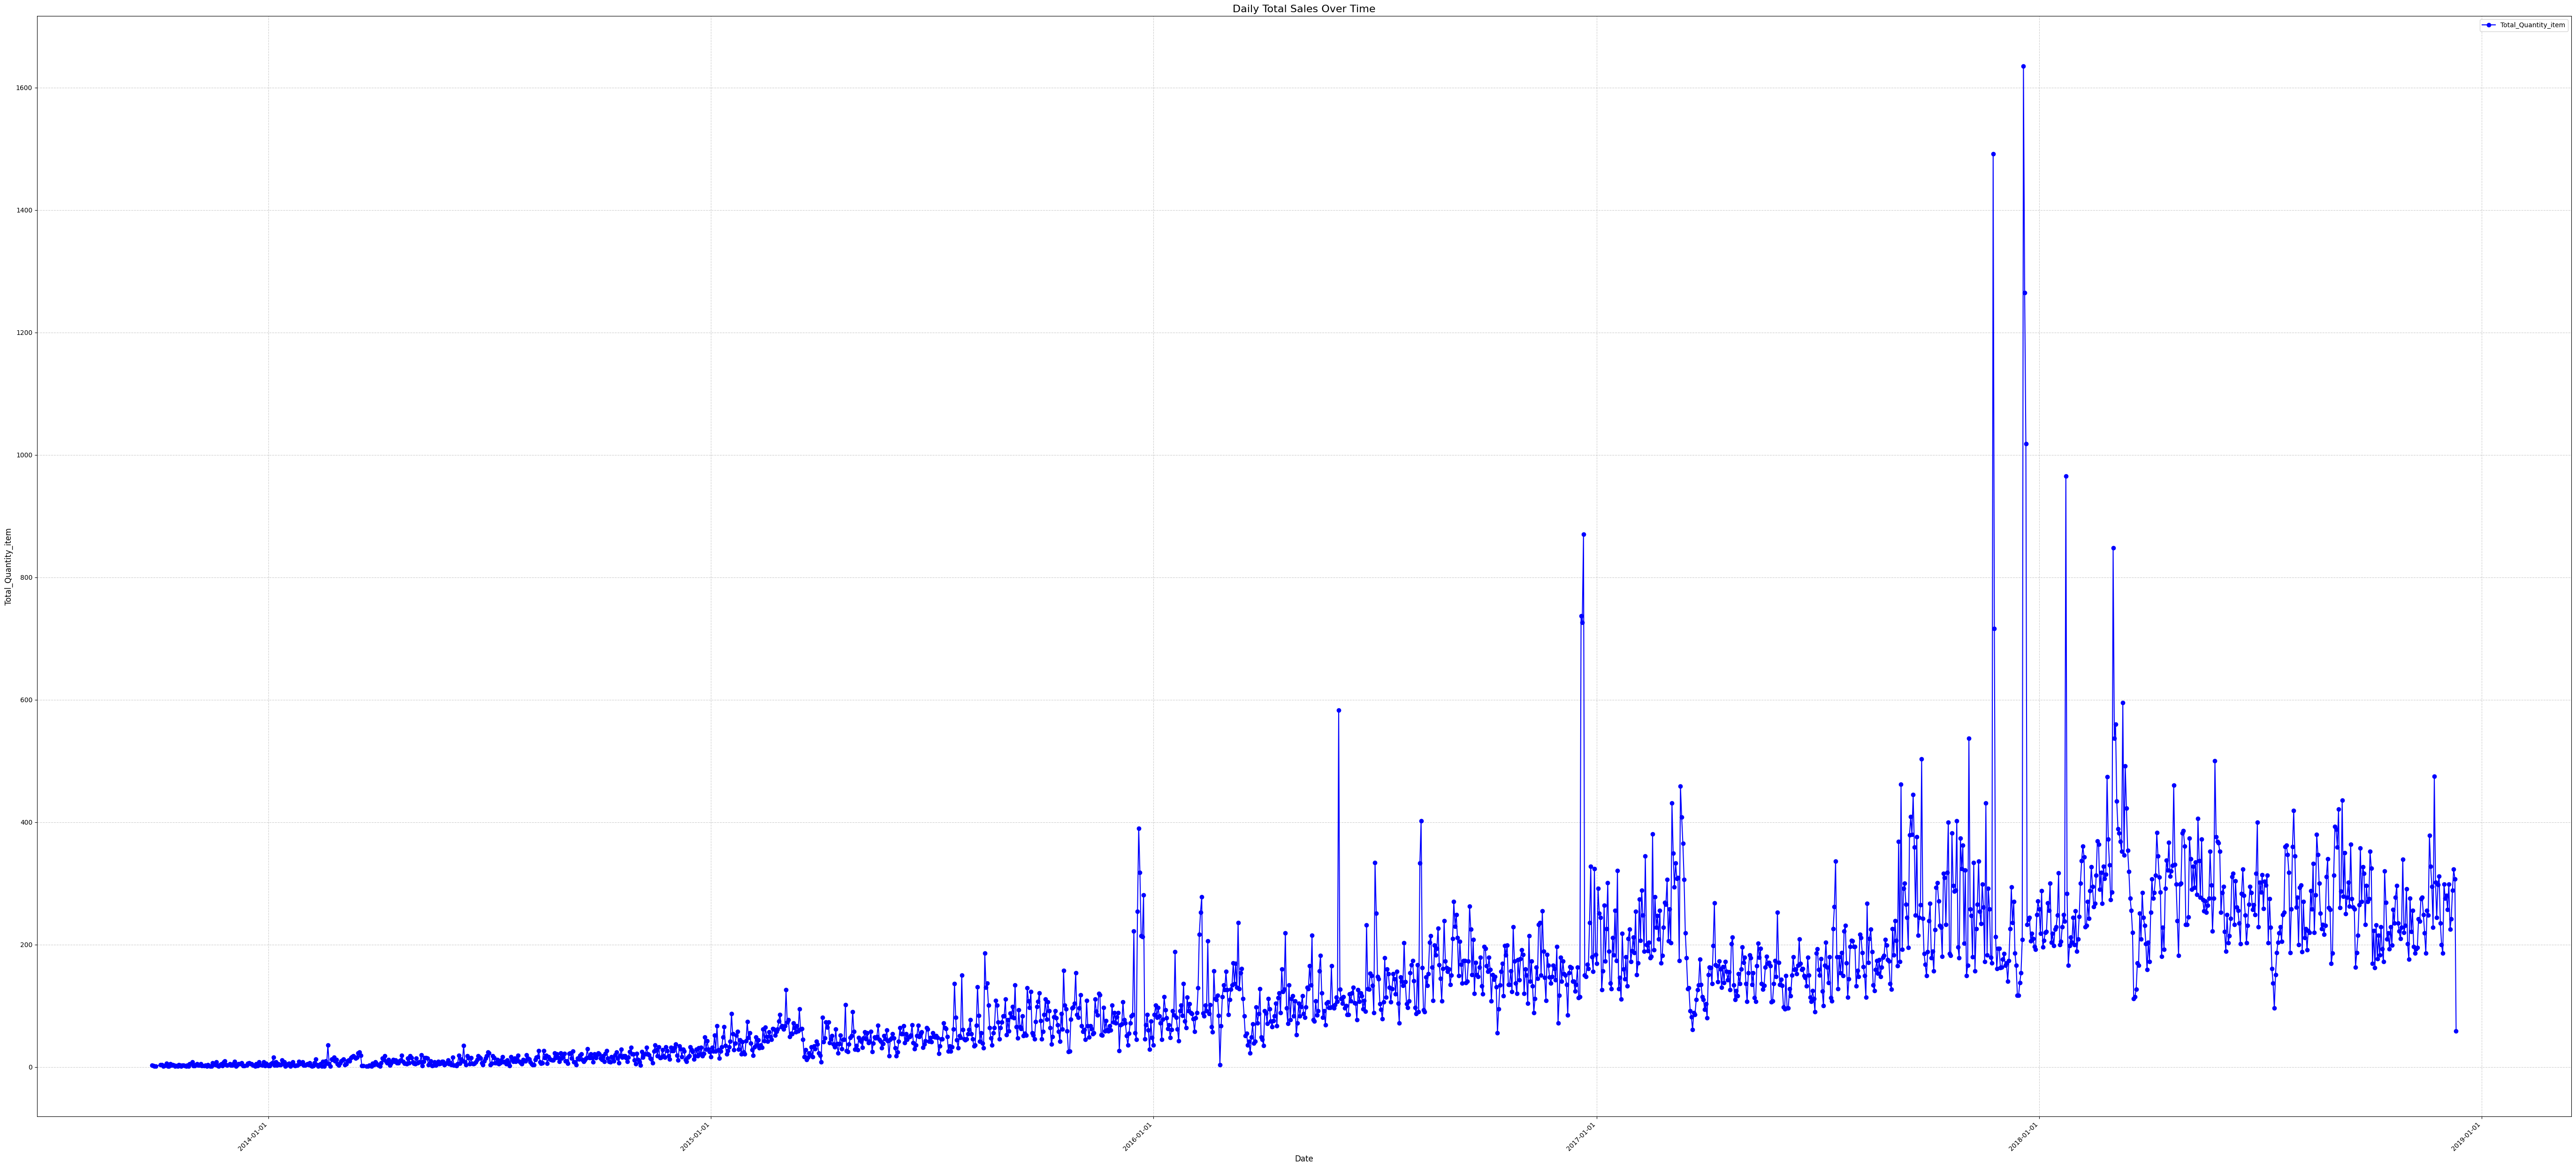

In [43]:
plt.figure(figsize=(55, 25))

plt.plot(daily_sales['DateTime'], daily_sales['Total_Quantity_item'], label='Total_Quantity_item', color='blue', marker='o', linestyle='-')

plt.title('Daily Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total_Quantity_item', fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # فرمت تاریخ: سال-ماه-روز
ax.xaxis.set_major_locator(mdates.AutoDateLocator()) # تنظیم خودکار محل قرارگیری تاریخ‌ها
plt.xticks(rotation=45, ha='right') # چرخش برچسب‌ها برای جلوگیری از همپوشانی

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()